In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score

In [52]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [53]:
import pandas as pd
import numpy as np
data = pd.read_csv("central_bank_india.csv", index_col='Date', parse_dates=["Date"])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2024-04-04 to 2014-04-04
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2464 non-null   int64  
 1   Open        2464 non-null   float64
 2   High        2464 non-null   float64
 3   Low         2464 non-null   float64
 4   Close       2464 non-null   float64
 5   Volume      2464 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 134.8+ KB


In [55]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# Set the 'Date' column as the index

# Now your dataframe will have 'Date' as the index

data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2024-04-04,66.39,67.00,64.14,64.94,"2,544,505"
1,2024-04-03,63.33,65.89,62.80,65.62,"1,690,023"
2,2024-04-02,63.35,64.20,62.10,63.19,"1,871,660"
3,2024-04-01,60.51,63.85,60.48,63.43,"1,565,080"
4,2024-03-28,57.67,61.65,57.67,59.78,"3,000,674"
...,...,...,...,...,...,...
2459,2014-04-11,51.15,51.70,50.50,51.15,"138,072"
2460,2014-04-10,52.00,52.80,50.70,51.20,"452,400"
2461,2014-04-09,50.70,52.20,50.40,51.90,"229,396"
2462,2014-04-07,50.30,53.50,49.65,50.55,"57,447"


In [56]:
data.describe()

,Open,High,Low,Close
count,2464.000000,2464.000000,2464.000000,2464.000000
mean,51.046445,51.989298,50.072524,50.914172
std,31.715138,32.250950,31.194346,31.671699
min,10.350000,10.850000,10.040000,10.210000
25%,20.450000,20.900000,20.000000,20.387500
50%,43.860000,44.695000,42.725000,43.620000
75%,77.775000,79.125000,76.000000,77.550000
max,125.000000,125.000000,117.500000,120.400000


In [7]:
len(df)

NameError: name 'df' is not defined

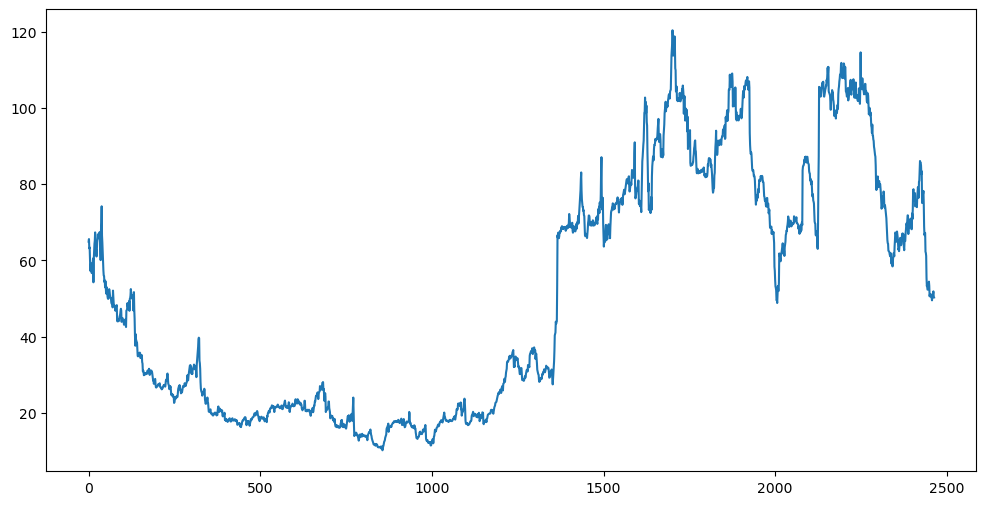

In [57]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')

In [58]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

In [59]:
# Additional Market Dynamics Attributes
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day Moving Average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day Moving Average
data['MACD'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean() - data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # Moving Average Convergence Divergence (MACD)

# Feature Engineering
data['HighMinusLow'] = data['High'] - data['Low']
data['OpenMinusClose'] = data['Open'] - data['Close']

In [60]:
data.dropna(inplace=True)

In [61]:
data

,Date,Open,High,Low,Close,Volume,RSI,MA10,MA50,MACD,HighMinusLow,OpenMinusClose
49,2024-01-19,53.19,55.00,52.50,54.60,"5,669,806",42.744063,57.249,61.9868,-2.696819,2.50,-1.41
50,2024-01-18,51.98,53.43,49.29,52.78,"2,495,318",26.177024,56.055,61.7436,-2.909723,4.14,-0.80
51,2024-01-17,52.03,52.70,51.03,51.32,"1,469,074",20.318979,54.980,61.4576,-3.159836,1.67,0.71
52,2024-01-16,52.87,54.34,51.75,53.07,"2,397,922",13.293995,54.336,61.2552,-3.180183,2.59,-0.20
53,2024-01-15,52.20,53.80,51.90,52.52,"3,549,495",17.666052,53.842,61.0370,-3.203758,1.90,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2014-04-11,51.15,51.70,50.50,51.15,"138,072",44.186047,50.660,66.9260,-4.585499,1.20,0.00
2460,2014-04-10,52.00,52.80,50.70,51.20,"452,400",35.483871,50.720,66.4550,-4.297190,2.10,0.80
2461,2014-04-09,50.70,52.20,50.40,51.90,"229,396",40.000000,50.790,65.9900,-3.966495,1.80,-1.20
2462,2014-04-07,50.30,53.50,49.65,50.55,"57,447",31.944444,50.770,65.5020,-3.769893,3.85,-0.25


In [62]:
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Volume,RSI,MA10,MA50,MACD,HighMinusLow,OpenMinusClose
0,2024-01-19,53.19,55.00,52.50,54.60,"5,669,806",42.744063,57.249,61.9868,-2.696819,2.50,-1.41
1,2024-01-18,51.98,53.43,49.29,52.78,"2,495,318",26.177024,56.055,61.7436,-2.909723,4.14,-0.80
2,2024-01-17,52.03,52.70,51.03,51.32,"1,469,074",20.318979,54.980,61.4576,-3.159836,1.67,0.71
3,2024-01-16,52.87,54.34,51.75,53.07,"2,397,922",13.293995,54.336,61.2552,-3.180183,2.59,-0.20
4,2024-01-15,52.20,53.80,51.90,52.52,"3,549,495",17.666052,53.842,61.0370,-3.203758,1.90,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2014-04-11,51.15,51.70,50.50,51.15,"138,072",44.186047,50.660,66.9260,-4.585499,1.20,0.00
2411,2014-04-10,52.00,52.80,50.70,51.20,"452,400",35.483871,50.720,66.4550,-4.297190,2.10,0.80
2412,2014-04-09,50.70,52.20,50.40,51.90,"229,396",40.000000,50.790,65.9900,-3.966495,1.80,-1.20
2413,2014-04-07,50.30,53.50,49.65,50.55,"57,447",31.944444,50.770,65.5020,-3.769893,3.85,-0.25


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load your stock dataset (replace with your actual data)
# For example, if you have a DataFrame df with relevant columns:
# df = pd.read_csv('your_stock_data.csv')
# df = df[['Close', 'Volume', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']]

df=data
# Normalize the data
scaler = MinMaxScaler()
df[['Close', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']] = scaler.fit_transform(df[['Close', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']])

# Define features (X) and target (y)
X = df[['Close','RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']]
y = (df['Close'].shift(-1) > df['Close']).astype(int)  # 1 if next day's Close price is higher, else 0

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create an LSTM classification model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
61/61 [==============================] - 3s 6ms/step - loss: 0.6908 - accuracy: 0.5331
Epoch 2/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5466
Epoch 3/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5466
Epoch 4/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5466
Epoch 5/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5466
Epoch 6/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5466
Epoch 7/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.5466
Epoch 8/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.5466
Epoch 9/10
61/61 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5466
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.4472
Test Loss: 0.7066, 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load your stock dataset (replace with your actual data)
# For example, if you have a DataFrame df with relevant columns:
# df = pd.read_csv('your_stock_data.csv')
# df = df[['Close', 'Volume', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']]

df=data
# Normalize the data
scaler = MinMaxScaler()
df[['Close', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']] = scaler.fit_transform(df[['Close', 'RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']])

# Define features (X) and target (y)
X = df[['Close','RSI', 'MA10', 'MA50', 'MACD', 'HighMinusLow', 'OpenMinusClose']]
y = (df['Close'].shift(-1) > df['Close']).astype(int)  # 1 if next day's Close price is higher, else -1

# Split the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Create an LSTM classification model
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
# model.add(Dense(units=1, activation='tanh'))  # Use tanh activation for output layer
# model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])  # Use hinge loss for classification

# # Train the model
# model.fit(x_train, y_train, epochs=50, batch_size=32)

# # Make predictions on test data
# y_pred = model.predict(x_test)
# y_pred = np.sign(y_pred).flatten()  # Convert back to 1 and -1

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
df['Target']=y
df

,Date,Open,High,Low,Close,Volume,RSI,MA10,MA50,MACD,HighMinusLow,OpenMinusClose,Target
0,2024-01-19,53.19,55.00,52.50,0.402850,"5,669,806",0.427441,0.438249,0.528044,0.239735,0.089871,0.343000,0
1,2024-01-18,51.98,53.43,49.29,0.386333,"2,495,318",0.261770,0.426962,0.525464,0.226363,0.152323,0.363333,0
2,2024-01-17,52.03,52.70,51.03,0.373083,"1,469,074",0.203190,0.416800,0.522429,0.210654,0.058264,0.413667,1
3,2024-01-16,52.87,54.34,51.75,0.388965,"2,397,922",0.132940,0.410712,0.520281,0.209376,0.093298,0.383333,0
4,2024-01-15,52.20,53.80,51.90,0.383973,"3,549,495",0.176661,0.406042,0.517966,0.207896,0.067022,0.379333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2014-04-11,51.15,51.70,50.50,0.371540,"138,072",0.441860,0.375963,0.580458,0.121112,0.040366,0.390000,1
2411,2014-04-10,52.00,52.80,50.70,0.371994,"452,400",0.354839,0.376530,0.575459,0.139220,0.074638,0.416667,1
2412,2014-04-09,50.70,52.20,50.40,0.378346,"229,396",0.400000,0.377192,0.570525,0.159990,0.063214,0.350000,0
2413,2014-04-07,50.30,53.50,49.65,0.366095,"57,447",0.319444,0.377003,0.565347,0.172338,0.141280,0.381667,0


        Date   Open   High    Low     Close     Volume       RSI      MA10  \
0 2024-01-19  53.19  55.00  52.50  0.402850  5,669,806  0.427441  0.438249   
1 2024-01-18  51.98  53.43  49.29  0.386333  2,495,318  0.261770  0.426962   
2 2024-01-17  52.03  52.70  51.03  0.373083  1,469,074  0.203190  0.416800   
3 2024-01-16  52.87  54.34  51.75  0.388965  2,397,922  0.132940  0.410712   
4 2024-01-15  52.20  53.80  51.90  0.383973  3,549,495  0.176661  0.406042   

       MA50      MACD  HighMinusLow  OpenMinusClose  Target  
0  0.528044  0.239735      0.089871        0.343000       0  
1  0.525464  0.226363      0.152323        0.363333       0  
2  0.522429  0.210654      0.058264        0.413667       1  
3  0.520281  0.209376      0.093298        0.383333       0  
4  0.517966  0.207896      0.067022        0.379333       0  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 8)              320       
                                                                 
 batch_normalization (Batch  (None, 7, 8)              32        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 7, 8)              544       
                                                                 
 batch_normalization_1 (Bat  (None, 7, 8)              32        
 chNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

25/25 [==============================] - 13s 75ms/step - loss: 0.7374 - accuracy: 0.5935 - val_loss: 0.7398 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 2/10
25/25 [==============================] - 0s 19ms/step - loss: 0.6852 - accuracy: 0.6479 - val_loss: 0.7350 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 3/10
25/25 [==============================] - 0s 18ms/step - loss: 0.6530 - accuracy: 0.6731 - val_loss: 0.7330 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 4/10
25/25 [==============================] - 0s 20ms/step - loss: 0.6332 - accuracy: 0.6880 - val_loss: 0.7320 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.6085 - accuracy: 0.7061 - val_loss: 0.7307 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 6/10
25/25 [==============================] - 0s 20ms/step - loss: 0.5879 - accuracy: 0.7275 - val_loss: 0.7292 - val_accuracy: 0.5607 - lr: 0.0010
Training completed in 16.59 seconds
Training Accuracy: 52.28%
Test Accuracy: 54.24%


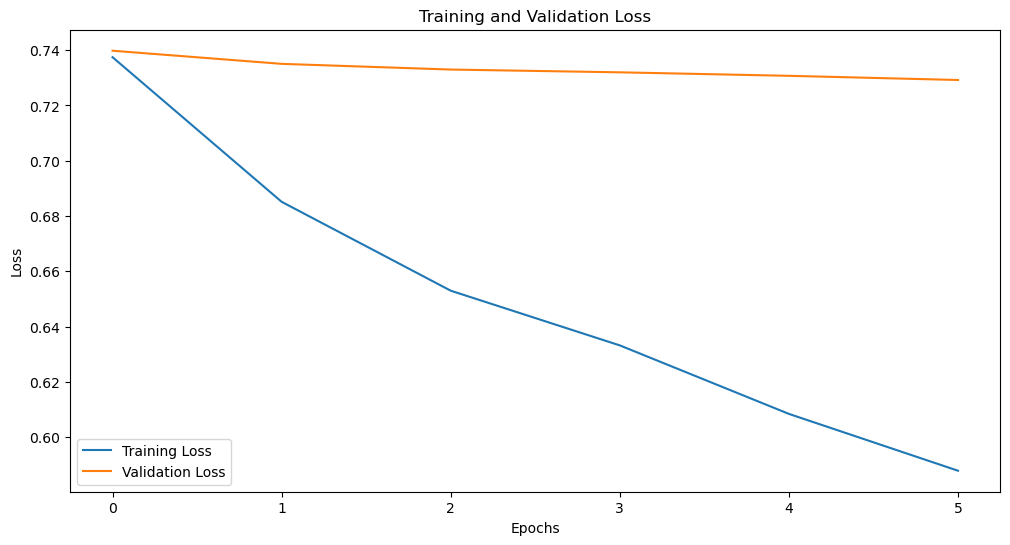

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

# Load the dataset
data = df # Replace 'path_to_your_dataset.csv' with the actual path to your dataset
print(data.head())

# Preprocessing
# Assuming the last column 'Target' is the target variable
X = data.drop(['Date', 'Target','Volume','Open','High','Low'], axis=1).values
y = data['Target'].values

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define model constants
T = X_train.shape[1]  # Number of time steps
N = X_train.shape[2]  # Number of features
LAYERS = [8, 8, 8, 1]  # Number of units in hidden and output layers
EPOCH = 10
BATCH = 64
LR = 0.01
LAMBD = 0.001
DP = 0.0
RDP = 0.0

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=LAYERS[0], input_shape=(T, N), return_sequences=True,
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1], return_sequences=True,
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=LR), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Define callbacks
lr_decay = ReduceLROnPlateau(monitor='loss', patience=1, verbose=0, factor=0.5, min_lr=1e-8)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
start = time()
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_split=0.2, shuffle=True, verbose=1,
                    callbacks=[lr_decay, early_stop])
print(f'Training completed in {time() - start:.2f} seconds')

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')



In [19]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from time import time

EPOCH = 100


# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
               patience=1, verbose=0, 
               factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0, 
              patience=30, verbose=1, mode='auto',
              baseline=0, restore_best_weights=True)

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=True, return_state=False,
        stateful=False, unroll=False
       ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=True, return_state=False,
        stateful=False, unroll=False
       ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=False, return_state=False,
        stateful=False, unroll=False
       ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
       metrics=['accuracy'],
       optimizer=Adam(lr=LR))
print(model.summary())

M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]


# Train the model without callbacks
start = time()
History = model.fit(X_train, y_train,
          epochs=EPOCH,
          batch_size=BATCH,
          validation_split=0.0,
          validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
          shuffle=True,verbose=1
       )
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 8)              320       
                                                                 
 batch_normalization_6 (Bat  (None, 7, 8)              32        
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 7, 8)              544       
                                                                 
 batch_normalization_7 (Bat  (None, 7, 8)              32        
 chNormalization)                                                
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 batch_normalization_8 (Bat  (None, 8)                

In [22]:
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
y_hat = model.predict(X_test, batch_size=M_TEST, verbose=1)

1/1 [==============================] - 0s 51ms/step


In [32]:
(y_hat)
threshold=0.5
y_pred = (y_hat > threshold).astype(int)   # 1 for higher, -1 for lower
y_pred=y_pred.flatten()
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8157
Precision: 0.8264
Recall: 0.8359
F1 Score: 0.8311


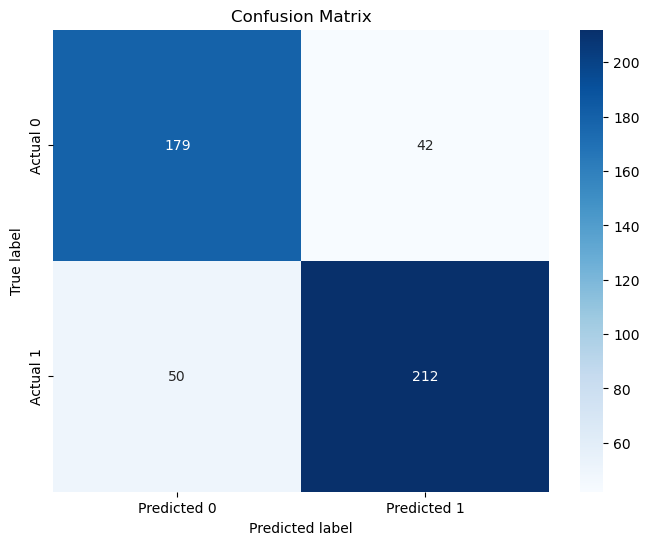

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# GRU

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

# Load the dataset
data = df # Replace 'path_to_your_dataset.csv' with the actual path to your dataset
print(data.head())

# Preprocessing
# Assuming the last column 'Target' is the target variable
X = data.drop(['Date', 'Target','Volume','Open','High','Low'], axis=1).values
y = data['Target'].values

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define model constants
T = X_train.shape[1]  # Number of time steps
N = X_train.shape[2]  # Number of features
LAYERS = [8, 8, 8, 1]  # Number of units in hidden and output layers
EPOCH = 10
BATCH = 64
LR = 0.01
LAMBD = 0.001
DP = 0.0
RDP = 0.0

# Build the GRU model
model = Sequential()
model.add(GRU(units=LAYERS[0], input_shape=(T, N), return_sequences=True,
              activation='tanh', recurrent_activation='hard_sigmoid',
              kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
              dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(GRU(units=LAYERS[1], return_sequences=True,
              activation='tanh', recurrent_activation='hard_sigmoid',
              kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
              dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(GRU(units=LAYERS[2],
              activation='tanh', recurrent_activation='hard_sigmoid',
              kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
              dropout=DP, recurrent_dropout=RDP))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=LR), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Define callbacks
lr_decay = ReduceLROnPlateau(monitor='loss', patience=1, verbose=0, factor=0.5, min_lr=1e-8)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
start = time()
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_split=0.2, shuffle=True, verbose=1,
                    callbacks=[lr_decay, early_stop])
print(f'Training completed in {time() - start:.2f} seconds')

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')


        Date   Open   High    Low     Close     Volume       RSI      MA10  \
0 2024-01-19  53.19  55.00  52.50  0.402850  5,669,806  0.427441  0.438249   
1 2024-01-18  51.98  53.43  49.29  0.386333  2,495,318  0.261770  0.426962   
2 2024-01-17  52.03  52.70  51.03  0.373083  1,469,074  0.203190  0.416800   
3 2024-01-16  52.87  54.34  51.75  0.388965  2,397,922  0.132940  0.410712   
4 2024-01-15  52.20  53.80  51.90  0.383973  3,549,495  0.176661  0.406042   

       MA50      MACD  HighMinusLow  OpenMinusClose  Target  
0  0.528044  0.239735      0.089871        0.343000       0  
1  0.525464  0.226363      0.152323        0.363333       0  
2  0.522429  0.210654      0.058264        0.413667       1  
3  0.520281  0.209376      0.093298        0.383333       0  
4  0.517966  0.207896      0.067022        0.379333       0  


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 7, 8)              264       
                                                                 
 batch_normalization_24 (Ba  (None, 7, 8)              32        
 tchNormalization)                                               
                                                                 
 gru_16 (GRU)                (None, 7, 8)              432       
                                                                 
 batch_normalization_25 (Ba  (None, 7, 8)              32        
 tchNormalization)                                               
                                                                 
 gru_17 (GRU)                (None, 8)                 432       
                                                                 
 batch_normalization_26 (Ba  (None, 8)               

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

# Load the dataset
data = df # Replace 'path_to_your_dataset.csv' with the actual path to your dataset
print(data.head())

# Preprocessing
# Assuming the last column 'Target' is the target variable
X = data.drop(['Date', 'Target','Volume','Open','High','Low'], axis=1).values
y = data['Target'].values

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define model constants
T = X_train.shape[1]  # Number of time steps
N = X_train.shape[2]  # Number of features
LAYERS = [8, 8, 8, 1]  # Number of units in hidden and output layers
EPOCH = 100
BATCH = 64
LR = 0.01
LAMBD = 0.001
DP = 0.0
RDP = 0.0

# Define a learning rate decay method
lr_decay = ReduceLROnPlateau(monitor='loss', 
               patience=1, verbose=0, 
               factor=0.5, min_lr=1e-8)

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_acc', min_delta=0, 
              patience=30, verbose=1, mode='auto',
              baseline=0, restore_best_weights=True)

# Build the Model
model = Sequential()
model.add(GRU(input_shape=(T, N), units=LAYERS[0],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=True
       ))
model.add(BatchNormalization())
model.add(GRU(units=LAYERS[1],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=True
       ))
model.add(BatchNormalization())
model.add(GRU(units=LAYERS[2],
        activation='tanh', recurrent_activation='hard_sigmoid',
        kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
        dropout=DP, recurrent_dropout=RDP,
        return_sequences=False
       ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
       metrics=['accuracy'],
       optimizer=Adam(lr=LR))
print(model.summary())

M_TEST = X_test.shape[0]  # number of test examples

# Train the model without callbacks
start = time()
History = model.fit(X_train, y_train,
          epochs=EPOCH,
          batch_size=BATCH,
          validation_split=0.0,
          validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
          shuffle=True, verbose=1
       )
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')


        Date   Open   High    Low     Close     Volume       RSI      MA10  \
0 2024-01-19  53.19  55.00  52.50  0.402850  5,669,806  0.427441  0.438249   
1 2024-01-18  51.98  53.43  49.29  0.386333  2,495,318  0.261770  0.426962   
2 2024-01-17  52.03  52.70  51.03  0.373083  1,469,074  0.203190  0.416800   
3 2024-01-16  52.87  54.34  51.75  0.388965  2,397,922  0.132940  0.410712   
4 2024-01-15  52.20  53.80  51.90  0.383973  3,549,495  0.176661  0.406042   

       MA50      MACD  HighMinusLow  OpenMinusClose  Target  
0  0.528044  0.239735      0.089871        0.343000       0  
1  0.525464  0.226363      0.152323        0.363333       0  
2  0.522429  0.210654      0.058264        0.413667       1  
3  0.520281  0.209376      0.093298        0.383333       0  
4  0.517966  0.207896      0.067022        0.379333       0  


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 7, 8)              264       
                                                                 
 batch_normalization_27 (Ba  (None, 7, 8)              32        
 tchNormalization)                                               
                                                                 
 gru_19 (GRU)                (None, 7, 8)              432       
                                                                 
 batch_normalization_28 (Ba  (None, 7, 8)              32        
 tchNormalization)                                               
                                                                 
 gru_20 (GRU)                (None, 8)                 432       
                                                                 
 batch_normalization_29 (Ba  (None, 8)               

In [88]:
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
y_hat = model.predict(X_test, batch_size=M_TEST, verbose=1)

1/1 [==============================] - 1s 584ms/step


In [89]:
(y_hat)
threshold=0.5
y_pred = (y_hat > threshold).astype(int)   # 1 for higher, -1 for lower
y_pred=y_pred.flatten()
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [92]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8137
Precision: 0.8333
Recall: 0.8206
F1 Score: 0.8269


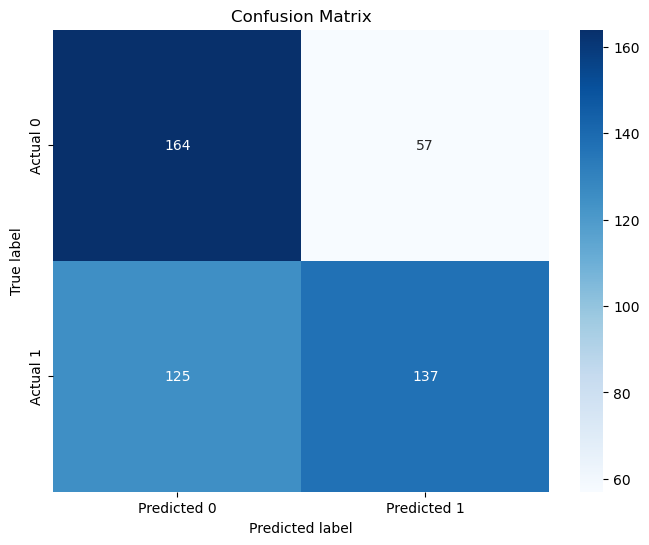

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/50
46/46 [==============================] - 3s 14ms/step - loss: 0.8120 - val_loss: 0.5772
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.3636 - val_loss: 0.1634
Epoch 3/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0963 - val_loss: 0.0388
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0294 - val_loss: 0.0166
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0102
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 8/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 11/50
46/46

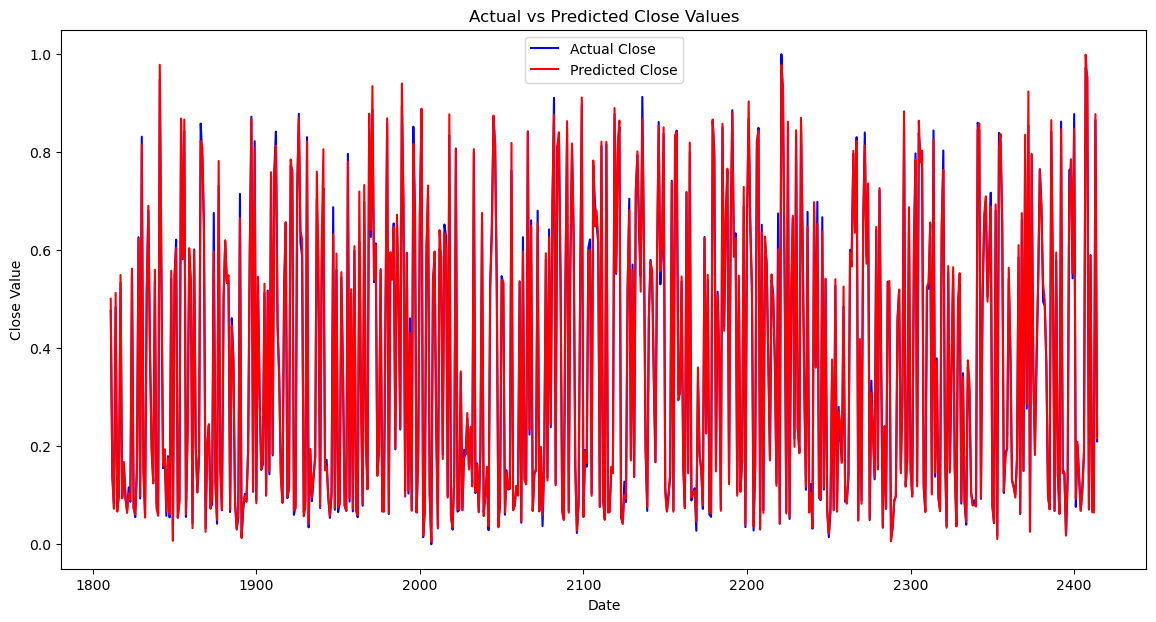

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the data
data 

# Prepare the data
X = data[['OpenMinusClose', 'HighMinusLow', 'RSI', 'MA10', 'MA50', 'MACD']]
y = data['Close']

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=44)

# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
predictions_scaled = model.predict(X_test_reshaped)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

y_test_orig = scaler_y.inverse_transform(y_test).flatten()

r2 = r2_score(y_test_orig, predictions)
rmse = mean_squared_error(y_test_orig, predictions, squared=False)
mae = mean_absolute_error(y_test_orig, predictions)
mse = mean_squared_error(y_test_orig, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test_orig, label='Actual Close', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()


In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close Value':predictions})
valid

In [50]:
data 

# Prepare the data
X = data[['OpenMinusClose', 'HighMinusLow', 'RSI', 'MA10', 'MA50', 'MACD']]
y = data['Close']
y

0       0.402850
1       0.386333
2       0.373083
3       0.388965
4       0.383973
          ...   
2410    0.371540
2411    0.371994
2412    0.378346
2413    0.366095
2414    0.363826
Name: Close, Length: 2415, dtype: float64

In [42]:
predictions

array([0.50087434, 0.13756524, 0.07241788, 0.5129593 , 0.06670704,
       0.09839388, 0.54960907, 0.09362262, 0.1666441 , 0.10308426,
       0.06390973, 0.10382196, 0.09154611, 0.56243086, 0.07335743,
       0.06087484, 0.14749403, 0.6241263 , 0.09788259, 0.8152635 ,
       0.14809005, 0.05431467, 0.51137596, 0.69059783, 0.3993453 ,
       0.18943094, 0.12401373, 0.56018215, 0.07374045, 0.0580362 ,
       0.9783701 , 0.5611249 , 0.15989298, 0.19351919, 0.06669184,
       0.17640366, 0.06129401, 0.55811936, 0.00695207, 0.5492904 ,
       0.60462916, 0.05516794, 0.08439776, 0.8685672 , 0.58369195,
       0.86654705, 0.06158497, 0.23044097, 0.6041233 , 0.53940976,
       0.03264692, 0.60003597, 0.19893064, 0.10584723, 0.1863631 ,
       0.82289916, 0.80947703, 0.6569094 , 0.02529811, 0.20119484,
       0.24493904, 0.0723257 , 0.09216367, 0.5965424 , 0.1254945 ,
       0.04956802, 0.7821913 , 0.15096636, 0.0708875 , 0.503908  ,
       0.62037325, 0.53475344, 0.5490408 , 0.07002532, 0.44559

In [49]:
# Prepare features and target for classification
X_cls = data[['OpenMinusClose', 'HighMinusLow', 'RSI', 'MA10', 'MA50', 'MACD']]
y_cls = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

# Split data into train and test sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.25, random_state=44)

# Feature Scaling for classification
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

In [50]:
# Assuming 'data' is a DataFrame with historical sequences
look_back = 60  # Number of past days to consider (adjust based on your data)

X = []
y = []
for i in range(look_back, len(data)):
    X.append(data.iloc[i-look_back:i, :])  # Features for each sequence
    y.append(np.where(data.loc[i, 'Close'] > data.loc[i-1, 'Close'], 1, -1))  # Classification target (up or down)

X = np.array(X)
y = np.array(y)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# Feature Scaling for classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# LSTM